<a href="https://colab.research.google.com/github/leeds1219/DL_and_AI_Notes_and_Projects/blob/main/Diffusion_model_ML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sources:**
- Github implementation [Denoising Diffusion Pytorch](https://github.com/lucidrains/denoising-diffusion-pytorch)
- Niels Rogge, Kashif Rasul, [Huggingface notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/annotated_diffusion.ipynb#scrollTo=3a159023)
- Papers on Diffusion models ([Dhariwal, Nichol, 2021], [Ho et al., 2020] ect.)
- https://colab.research.google.com/drive/1sjy9odlSSy0RBVgMTgP7s99NXsqglsUL?usp=sharing

In [33]:
import torch
import torchvision
import matplotlib.pyplot as plt

def show_images(datset, num_samples=20, cols=4):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15))
    for i, img in enumerate(data):
        if i == num_samples:
            break
        plt.subplot(int(num_samples/cols) + 1, cols, i + 1)
        plt.imshow(img[0])

data = torchvision.datasets.CelebA(root=".", download=True)
show_images(data)

RuntimeError: ignored

In [34]:
# CelebA datasets
import gdown
url = 'https://drive.google.com/u/0/uc?id=1kLhibynPmu8Xc97TNTp8oN-UCRXcrx3_&export=download'
output = 'archive.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('archive.zip')


Downloading...
From: https://drive.google.com/u/0/uc?id=1kLhibynPmu8Xc97TNTp8oN-UCRXcrx3_&export=download
To: /content/archive.zip
100%|██████████| 1.43G/1.43G [00:45<00:00, 31.1MB/s]


['img_align_celeba/img_align_celeba/000001.jpg',
 'img_align_celeba/img_align_celeba/000002.jpg',
 'img_align_celeba/img_align_celeba/000003.jpg',
 'img_align_celeba/img_align_celeba/000004.jpg',
 'img_align_celeba/img_align_celeba/000005.jpg',
 'img_align_celeba/img_align_celeba/000006.jpg',
 'img_align_celeba/img_align_celeba/000007.jpg',
 'img_align_celeba/img_align_celeba/000008.jpg',
 'img_align_celeba/img_align_celeba/000009.jpg',
 'img_align_celeba/img_align_celeba/000010.jpg',
 'img_align_celeba/img_align_celeba/000011.jpg',
 'img_align_celeba/img_align_celeba/000012.jpg',
 'img_align_celeba/img_align_celeba/000013.jpg',
 'img_align_celeba/img_align_celeba/000014.jpg',
 'img_align_celeba/img_align_celeba/000015.jpg',
 'img_align_celeba/img_align_celeba/000016.jpg',
 'img_align_celeba/img_align_celeba/000017.jpg',
 'img_align_celeba/img_align_celeba/000018.jpg',
 'img_align_celeba/img_align_celeba/000019.jpg',
 'img_align_celeba/img_align_celeba/000020.jpg',
 'img_align_celeba/i

# Building

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

def show_images(datset, num_samples=20, cols=4):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15))
    for i, img in enumerate(data):
        if i == num_samples:
            break
        plt.subplot(int(num_samples/cols) + 1, cols, i + 1)
        plt.imshow(img[0])

#data = torchvision.datasets.StanfordCars(root=".", download=True)
#data = torchvision.datasets.FGVCAircraft(root = ".", download=True)
# try custom dataset
#show_images(data)

In [2]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=1eCGtytyHKu5DWo-MKbSJxZm5iKoUWpbN&export=download'
output = 'FFHQ.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('FFHQ.zip')

Downloading...
From: https://drive.google.com/u/0/uc?id=1eCGtytyHKu5DWo-MKbSJxZm5iKoUWpbN&export=download
To: /content/FFHQ.zip
100%|██████████| 30.0M/30.0M [00:00<00:00, 133MB/s]


['00000/00970.png',
 '00000/00998.png',
 '00000/00985.png',
 '00000/00992.png',
 '00000/00986.png',
 '00000/00994.png',
 '00000/00996.png',
 '00000/00999.png',
 '00000/00977.png',
 '00000/00995.png',
 '00000/00987.png',
 '00000/00981.png',
 '00000/00980.png',
 '00000/00984.png',
 '00000/00971.png',
 '00000/00988.png',
 '00000/00983.png',
 '00000/00969.png',
 '00000/00982.png',
 '00000/00997.png',
 '00000/00989.png',
 '00000/00991.png',
 '00000/00958.png',
 '00000/00955.png',
 '00000/00956.png',
 '00000/00972.png',
 '00000/00974.png',
 '00000/00978.png',
 '00000/00973.png',
 '00000/00962.png',
 '00000/00967.png',
 '00000/00990.png',
 '00000/00950.png',
 '00000/00976.png',
 '00000/00979.png',
 '00000/00951.png',
 '00000/00993.png',
 '00000/00957.png',
 '00000/00947.png',
 '00000/00964.png',
 '00000/00960.png',
 '00000/00966.png',
 '00000/00968.png',
 '00000/00948.png',
 '00000/00953.png',
 '00000/00938.png',
 '00000/00965.png',
 '00000/00940.png',
 '00000/00961.png',
 '00000/00939.png',


In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_list[idx])
        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

# Create an instance of the dataset
FFHQ = CustomDataset(root_dir='/content/00000', transform=None)

# Create a DataLoader to iterate over the dataset
#dataloader = DataLoader(FFHQ, batch_size=128, shuffle=True)

# Example of using the DataLoader
#for batch in dataloader:
    # Access the batch of resized images
#    print(batch.shape)  # This will print torch.Size([32, 3, 64, 64])
#    break

In [4]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os

#total_size = len(FFHQ)
#train_size = int(0.8 * total_size)
#test_size = total_size - train_size

#train_set, test_set = random_split(FFHQ, [train_size, test_size])
#data = torch.utils.data.ConcatDataset([train_set, test_set])

In [24]:
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np

IMG_SIZE = 64
BATCH_SIZE = 128

def load_transformed_dataset():
    data_transforms = [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), # Scales data into [0,1]
        transforms.Lambda(lambda t: (t * 2) - 1) # Scale between [-1, 1]
    ]
    data_transform = transforms.Compose(data_transforms)

    train_transformed = CustomDataset(root_dir='/content/00000', transform=data_transform)
#    test_transformed = CustomDataset(root_dir='/content/00000', transform=data_transform)

#    return torch.utils.data.ConcatDataset([train_transformed, test_transformed])
    return train_transformed

def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :]
    plt.imshow(reverse_transforms(image))

data = load_transformed_dataset()
dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

In [25]:
len(data)

1000

In [17]:
data[0]

tensor([[[ 0.0118,  0.0118,  0.0196,  ...,  0.0196,  0.0118,  0.0196],
         [ 0.0196,  0.0196,  0.0275,  ...,  0.0275,  0.0196,  0.0196],
         [ 0.0275,  0.0275,  0.0275,  ...,  0.0275,  0.0275,  0.0275],
         ...,
         [-0.7176, -0.8118, -0.8745,  ..., -0.8275, -0.8196, -0.8196],
         [-0.7098, -0.7882, -0.8275,  ..., -0.8824, -0.8745, -0.8824],
         [-0.7725, -0.7804, -0.7882,  ..., -0.8980, -0.8902, -0.8902]],

        [[ 0.2784,  0.2784,  0.2863,  ...,  0.2627,  0.2627,  0.2549],
         [ 0.2784,  0.2863,  0.2863,  ...,  0.2706,  0.2706,  0.2627],
         [ 0.2863,  0.2863,  0.2941,  ...,  0.2784,  0.2784,  0.2706],
         ...,
         [-0.7255, -0.8039, -0.8824,  ..., -0.8196, -0.8118, -0.8196],
         [-0.7176, -0.7961, -0.8431,  ..., -0.8667, -0.8588, -0.8667],
         [-0.7961, -0.8118, -0.8196,  ..., -0.8824, -0.8745, -0.8745]],

        [[ 0.6549,  0.6549,  0.6549,  ...,  0.6314,  0.6235,  0.6235],
         [ 0.6549,  0.6627,  0.6627,  ...,  0

In [7]:
import torch.nn.functional as F

def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    return torch.linspace(start, end, timesteps)

def get_index_from_list(vals, t, x_shape):
    """
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    batch_size = t.shape[0]
    out = vals.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

def forward_diffusion_sample(x_0, t, device="cpu"):
    """
    Takes an image and a timestep as input and
    returns the noisy version of it
    """
    noise = torch.randn_like(x_0)
    sqrt_alphas_cumprod_t = get_index_from_list(sqrt_alphas_cumprod, t, x_0.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x_0.shape
    )
    # mean + variance
    return sqrt_alphas_cumprod_t.to(device) * x_0.to(device) \
    + sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device), noise.to(device)


# Define beta schedule
T = 300
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

<ipython-input-8-f4853fe96c6f>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_images+1, int(idx/stepsize) + 1)


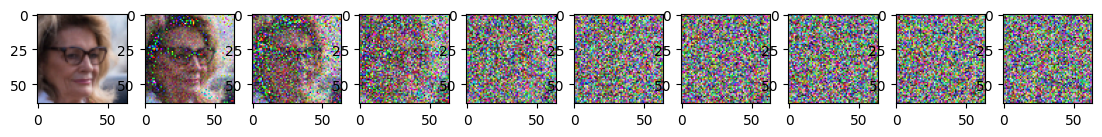

In [8]:
# Simulate forward diffusion
image = next(iter(dataloader))[0]

plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(T/num_images)

for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(image, t)
    show_tensor_image(img)

In [13]:
from torch import nn
import math

class Block(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp =  nn.Linear(time_emb_dim, out_ch)
        if up:
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()
    def forward(self, x, t, ):
#    def forward(self, x, t):
        # First Conv
        h = self.bnorm1(self.relu(self.conv1(x)))
        # Time embedding
        time_emb = self.relu(self.time_mlp(t))
        # Extend last 2 dimensions
        time_emb = time_emb[(..., ) + (None, ) * 2]
        # Add time channel
        h = h + time_emb
        # Second Conv
        h = self.bnorm2(self.relu(self.conv2(h)))
        # Down or Upsample
        return self.transform(h)


class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # TODO: Double check the ordering here
        return embeddings


class SimpleUnet(nn.Module):
    """
    A simplified variant of the Unet architecture.
    """
    def __init__(self):
        super().__init__()
        image_channels = 3
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 3
        time_emb_dim = 32

        # Time embedding
        self.time_mlp = nn.Sequential(
                SinusoidalPositionEmbeddings(time_emb_dim),
                nn.Linear(time_emb_dim, time_emb_dim),
                nn.ReLU()
            )

        # Initial projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample
        self.downs = nn.ModuleList([Block(down_channels[i], down_channels[i+1], \
                                    time_emb_dim) \
                    for i in range(len(down_channels)-1)])
        # Upsample
        self.ups = nn.ModuleList([Block(up_channels[i], up_channels[i+1], \
                                        time_emb_dim, up=True) \
                    for i in range(len(up_channels)-1)])

        # Edit: Corrected a bug found by Jakub C (see YouTube comment)
        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embedd time
        t = self.time_mlp(timestep)
        # Initial conv
        x = self.conv0(x)
        # Unet
        residual_inputs = []
        for down in self.downs:
            x = down(x, t)
            residual_inputs.append(x)
        for up in self.ups:
            residual_x = residual_inputs.pop()
            # Add residual x as additional channels
            x = torch.cat((x, residual_x), dim=1)
            x = up(x, t)
        return self.output(x)

model = SimpleUnet()
print("Num params: ", sum(p.numel() for p in model.parameters()))
model

Num params:  62438883


SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

In [15]:
def get_loss(model, x_0, t):
    #x_noisy, noise = forward_diffusion_sample(x_0, t)
    x_noisy, noise = forward_diffusion_sample(x_0, t, device)
    noise_pred = model(x_noisy, t)
    return F.l1_loss(noise, noise_pred)

In [19]:
data[0].shape

torch.Size([3, 64, 64])

In [20]:
dataloader

In [11]:
@torch.no_grad()
def sample_timestep(x, t):
    """
    Calls the model to predict the noise in the image and returns
    the denoised image.
    Applies noise to this image, if we are not in the last step yet.
    """
    betas_t = get_index_from_list(betas, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x.shape
    )
    sqrt_recip_alphas_t = get_index_from_list(sqrt_recip_alphas, t, x.shape)

    # Call model (current image - noise prediction)
    model_mean = sqrt_recip_alphas_t * (
        x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t
    )
    posterior_variance_t = get_index_from_list(posterior_variance, t, x.shape)

    if t == 0:
        # As pointed out by Luis Pereira (see YouTube comment)
        # The t's are offset from the t's in the paper
        return model_mean
    else:
        noise = torch.randn_like(x)
        return model_mean + torch.sqrt(posterior_variance_t) * noise

@torch.no_grad()
def sample_plot_image():
    # Sample noise
    img_size = IMG_SIZE
    img = torch.randn((1, 3, img_size, img_size), device=device)
    plt.figure(figsize=(15,15))
    plt.axis('off')
    num_images = 10
    stepsize = int(T/num_images)

    for i in range(0,T)[::-1]:
        t = torch.full((1,), i, device=device, dtype=torch.long)
        img = sample_timestep(img, t)
        # Edit: This is to maintain the natural range of the distribution
        img = torch.clamp(img, -1.0, 1.0)
        if i % stepsize == 0:
            plt.subplot(1, num_images, int(i/stepsize)+1)
            show_tensor_image(img.detach().cpu())
    plt.show()

# Training

In [31]:
from torch.optim import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 100 # Try more!

for epoch in range(epochs):
    for step, batch in enumerate(dataloader):
      optimizer.zero_grad()

      t = torch.randint(0, T, (BATCH_SIZE,), device=device).long()
#      print("Shape of batch[0]:", batch.shape)
      loss = get_loss(model, batch[0], t)
      loss.backward()
      optimizer.step()

      if epoch % 5 == 0 and step == 0:
        print(f"Epoch {epoch} | step {step:03d} Loss: {loss.item()} ")
        sample_plot_image()

Shape of batch[0]: torch.Size([128, 3, 64, 64])


RuntimeError: ignored